In [ ]:
# **실습4**
# ### **wine recognition 데이터를 이용한 <span style="color:darkgreen">AI 예측</span> 문제**
# ---

In [23]:
from sklearn.datasets import load_wine
wine = load_wine()

x = wine.data
y = wine.target
col_names = wine.feature_names


In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
print(len(x))
print(len(x[0]))
print(x.shape)

178
13
(178, 13)


In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2022)

print(x_train.shape)
print(y_train.shape)

(142, 13)
(142,)


In [56]:
from sklearn.tree import DecisionTreeClassifier

trees = []
for i in range(1,15):
    tree = DecisionTreeClassifier(max_depth= i ,random_state=2021)
    a = tree.fit(x_train, y_train)
    trees.append(a)
    
print(trees)


[DecisionTreeClassifier(max_depth=1, random_state=2021), DecisionTreeClassifier(max_depth=2, random_state=2021), DecisionTreeClassifier(max_depth=3, random_state=2021), DecisionTreeClassifier(max_depth=4, random_state=2021), DecisionTreeClassifier(max_depth=5, random_state=2021), DecisionTreeClassifier(max_depth=6, random_state=2021), DecisionTreeClassifier(max_depth=7, random_state=2021), DecisionTreeClassifier(max_depth=8, random_state=2021), DecisionTreeClassifier(max_depth=9, random_state=2021), DecisionTreeClassifier(max_depth=10, random_state=2021), DecisionTreeClassifier(max_depth=11, random_state=2021), DecisionTreeClassifier(max_depth=12, random_state=2021), DecisionTreeClassifier(max_depth=13, random_state=2021), DecisionTreeClassifier(max_depth=14, random_state=2021)]


In [57]:
accs = []
for i in range(0,14):
    accs.append(trees[i].score(x_test, y_test))
print(accs)

[0.7222222222222222, 0.8611111111111112, 0.9444444444444444, 0.9722222222222222, 0.9722222222222222, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


가장 성능이 좋은 depth: 6


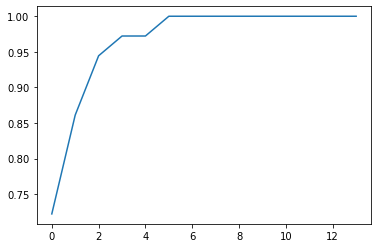

In [60]:
plt.plot(accs)
#plt.scatter(x = accs, y =[0,1,2,3,4,5,6,7,8,9,10,11,12,13])

max_acc = max(accs)
depth = 0
for i in range(len(accs)):
    if max_acc == accs[i]:
        depth =i+1
        break
print('가장 성능이 좋은 depth:', depth)

In [61]:
trees = []
for i in range(5,16):
    tree = DecisionTreeClassifier(min_samples_leaf = i, max_depth=depth,random_state=2021)
    a = tree.fit(x_train, y_train)
    trees.append(a)
    
print(trees)

[DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=2021), DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=2021), DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, random_state=2021), DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=2021), DecisionTreeClassifier(max_depth=6, min_samples_leaf=9, random_state=2021), DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=2021), DecisionTreeClassifier(max_depth=6, min_samples_leaf=11, random_state=2021), DecisionTreeClassifier(max_depth=6, min_samples_leaf=12, random_state=2021), DecisionTreeClassifier(max_depth=6, min_samples_leaf=13, random_state=2021), DecisionTreeClassifier(max_depth=6, min_samples_leaf=14, random_state=2021), DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, random_state=2021)]


In [63]:
accs = []
for tree in trees :
    acc = tree.score(x_test,y_test)
    accs.append(acc)
print(accs)

[0.9722222222222222, 0.9722222222222222, 0.9722222222222222, 1.0, 0.8611111111111112, 0.8611111111111112, 0.8611111111111112, 0.75, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334]


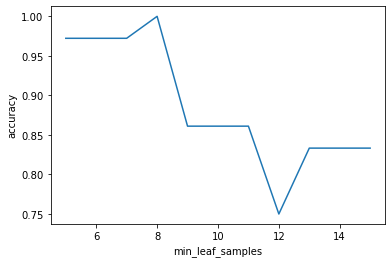

가장 성능이 좋은 sample 수: 8


In [64]:
plt.plot(range(5,16),accs)
plt.xlabel('min_leaf_samples')
plt.ylabel('accuracy')
plt.show()

samples = 0 #가장 성능이 좋은 최소 생플 수
idx = 0 #가장 성능이 좋은 tree 인덱스

max_acc = max(accs)
for i in range(len(accs)):
    if accs[i]==max_acc:
        samples = i+5
        idx = i
        break
print('가장 성능이 좋은 sample 수:', samples)

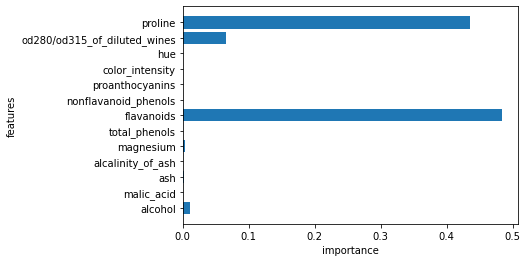

In [65]:
rfi = trees[idx].feature_importances_
plt.barh(col_names, rfi)
plt.ylabel('features')
plt.xlabel('importance')
plt.show()


In [66]:
print(accs[idx])

1.0


In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [67]:
model = Sequential()
model.add(Dense(256, input_shape=x_train.shape[1:], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=10)
mc = ModelCheckpoint('best_model4.h5', monitor='val_loss', batch_size=64, mode='auto', save_best_only=True)

history = model.fit(
    x=x_train, y=y_train,
    epochs=2000,
    validation_data=(x_test, y_test),
    callbacks=[es, mc],
    verbose=1)



Epoch 1/2000
5/5 [==============================] - 0s 39ms/step - loss: 56.0345 - acc: 0.0845 - val_loss: 9.3215 - val_acc: 0.3611
Epoch 2/2000
5/5 [==============================] - 0s 14ms/step - loss: 15.9529 - acc: 0.3521 - val_loss: 4.3322 - val_acc: 0.4167
Epoch 3/2000
5/5 [==============================] - 0s 8ms/step - loss: 13.1454 - acc: 0.3732 - val_loss: 5.0983 - val_acc: 0.4444
Epoch 4/2000
5/5 [==============================] - 0s 15ms/step - loss: 10.6954 - acc: 0.4296 - val_loss: 3.3470 - val_acc: 0.4444
Epoch 5/2000
5/5 [==============================] - 0s 14ms/step - loss: 9.1783 - acc: 0.4014 - val_loss: 2.5502 - val_acc: 0.5556
Epoch 6/2000
5/5 [==============================] - 0s 8ms/step - loss: 6.9083 - acc: 0.4155 - val_loss: 6.2637 - val_acc: 0.3889
Epoch 7/2000
5/5 [==============================] - 0s 10ms/step - loss: 6.2551 - acc: 0.4718 - val_loss: 3.1023 - val_acc: 0.3889
Epoch 8/2000
5/5 [==============================] - 0s 12ms/step - loss: 5.3236 -

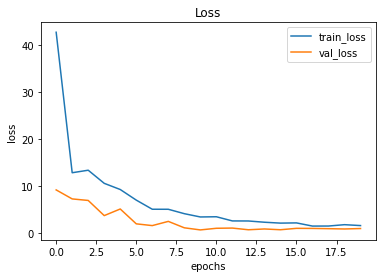

In [69]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')

plt.legend()
plt.show()